# Results on 10 authors

In [22]:
import numpy as np
import os
from train import model_fn
import matplotlib.pyplot as plt
from siamese_triplet import data_to_Iterator, extract_embeddings
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNC
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import pickle
%matplotlib inline

In [23]:
data_dir = '../data/processed/'
data_name = 'top10.json'
prefix = data_name[:-5]
file_dict = prefix + '_dict.pkl'
tokenized_train_data = prefix + '_train.pkl'
tokenized_valid_data = prefix + '_valid.pkl'
tokenized_test_data = prefix + '_test.pkl'

content_train_data = prefix + '_train_c.pkl'
content_valid_data = prefix + '_valid_c.pkl'
content_test_data = prefix + '_test_c.pkl'


In [44]:
with open(data_dir + content_train_data, 'rb') as f:
    train_content, train_l = pickle.load(f)
    
with open(data_dir + content_valid_data, 'rb') as f:
    valid_content, _ = pickle.load(f)
    
with open(data_dir + content_test_data, 'rb') as f:
    test_content, _ = pickle.load(f)

## Load model

In [25]:
MODEL , hist = model_fn('./trained_models');

Loading model.
model_info: {'INPUT_DIM': 17866, 'WORD_EMBEDDING_DIM': 100, 'N_FILTERS': 100, 'FILTER_SIZES': [2, 3, 4], 'AUTHOR_DIM': 2, 'DROPOUT': 0.5, 'PAD_IDX': 1, 'TRAIN_HISTORY': ([450.0, 450.0, 449.8, 449.3333333333333, 448.4, 446.26666666666665, 438.3333333333333, 436.2, 427.26666666666665, 424.26666666666665, 425.53333333333336, 422.1333333333333, 420.53333333333336, 414.26666666666665, 411.73333333333335, 413.73333333333335, 411.3333333333333, 408.46666666666664, 403.93333333333334, 399.6], [415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 415.0, 407.0, 412.0, 415.0, 408.0, 415.0, 412.0, 409.0, 413.0, 415.0, 415.0, 407.0, 412.0, 411.0]), 'LR': 0.004, 'MARGIN': 0.23}
Done loading model.


### Learning history

Text(0, 0.5, 'Average non-zero triplets')

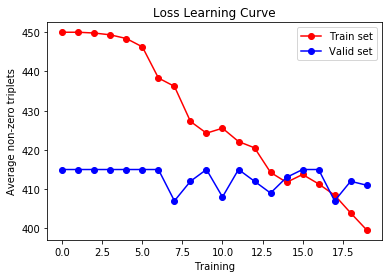

In [26]:
import matplotlib.pyplot as plt

title = 'Loss Learning Curve'
plt.title(title)
plt.plot([i for i in hist[0]], 'o-', color="r",label= "Train set")
plt.plot([i for i in hist[1]],  'o-', color="b", label="Valid set")
plt.legend(loc="best")
plt.xlabel("Training")
plt.ylabel("Average non-zero triplets")

## Extract and plot word embeddings

In [27]:
import seaborn as sns
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
author_list =  ['Tennyson', 'Swinburne', 'Browning', 'Pope', 'Whitman', 'Wordsworth', 'Shakespeare', 
                'Spenser', 'Arnold', 'Shelley', 'Beowulf', 'Dryden'] 
author_dict = {i: j  for i,j in enumerate(author_list)}

classes = [author_dict[i] for i in classes]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf','#17cf84', '#1e2161']
def plot_embeddings(embeddings, targets, xlim=None, ylim=None,  save_plot= None,linewidths=2 ,legend= False,
                   figsize=(9,8),leyend_prop=18):
    plt.figure(figsize=(figsize))
    #sns.palplot(sns.hls_palette(8, l=.3, s=.8))
    for i in range(10):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=1,linewidths=linewidths , color=colors[i])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if legend: plt.legend(classes, prop={'size': leyend_prop} )
    plt.tick_params(axis='both', labelsize=20)
    if save_plot!=None:
        plt.savefig('../media/'+save_plot)

In [28]:
# Create data iterators
train_Loader = data_to_Iterator(data_dir,tokenized_train_data, False)
valid_Loader = data_to_Iterator(data_dir,tokenized_valid_data, False)
test_Loader = data_to_Iterator(data_dir,tokenized_test_data,False)

In [29]:
# Extract authorcoder embeddings
train_emb, train_labels = extract_embeddings(train_Loader, MODEL, 2)
valid_emb, valid_labels = extract_embeddings(valid_Loader, MODEL, 2)
test_emb, test_labels = extract_embeddings(test_Loader, MODEL, 2)

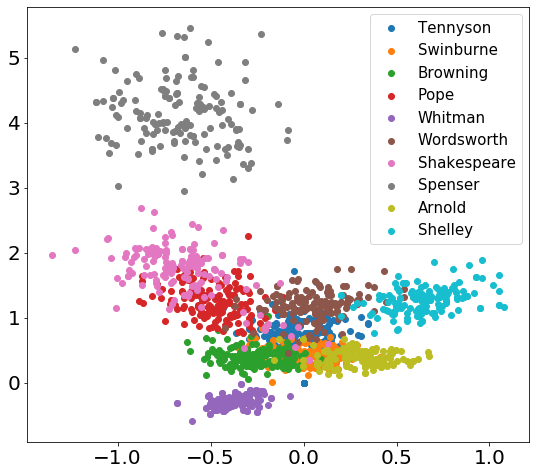

In [30]:
plot_embeddings(train_emb, train_labels, save_plot='training.png', linewidths=1, legend= True, leyend_prop=15)

In [31]:
import pandas as pd
#df_content = pd.read_csv('../data/processed/top10_train.csv', index_col=0)
df = pd.DataFrame(train_emb, columns= ['d1', 'd2'])
df['label'] = train_labels.reshape(len(train_labels),1)
df['author'] = df['label'].apply(lambda x: author_list[int(x)])
df['content'] = train_content
df

,d1,d2,label,author,content
0,0.082231,0.633264,1.0,Swinburne,"now has descended a serener hour , \n and with..."
1,0.165562,0.473884,1.0,Swinburne,"all parts away for the progress of souls , \n ..."
2,-0.218890,0.321413,1.0,Swinburne,would die for sullen seeming death may give \n...
3,0.004532,0.457046,1.0,Swinburne,"ring out the want , the care , the sin , \n th..."
4,0.259344,0.370174,1.0,Swinburne,he dreamed but arthur with a hundred spears \n...
...,...,...,...,...,...
1558,0.000000,0.000000,0.0,Tennyson,"but in such lays as neither ebb , nor flow , \..."
1559,0.000000,0.000000,0.0,Tennyson,"an ' ' e ligs on ' is back i ' the grip , wi '..."
1560,0.000000,0.000000,0.0,Tennyson,tuwhoo ! do ye see it ? do ye see the star ? \...
1561,0.000000,0.000000,0.0,Tennyson,"this woven raiment of nights and days , \n wer..."


In [43]:
cols.values

array([213, 150, 150, 150, 150, 150, 150, 150, 150, 150])

## Distribution of authors on training set

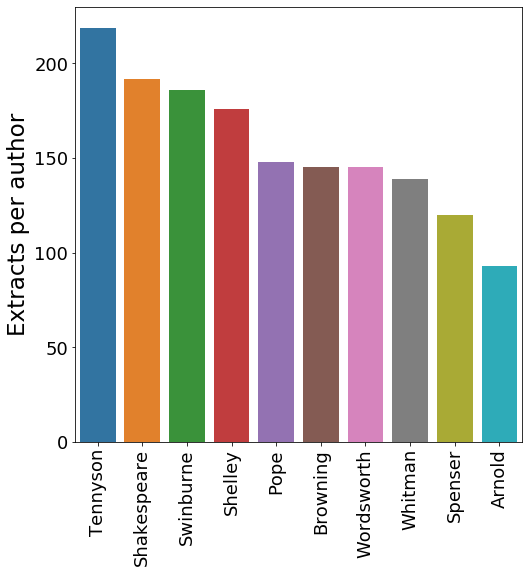

In [64]:
FONTSIZE= 18
cols = df.author.value_counts()
fig = plt.figure(figsize=(8,8))
ax = sns.barplot( cols.index, pd.DataFrame(np.array(train_l))[0].value_counts() , linewidth=1);
#ax.set_title('Poetry scrap from the poetry foundation', fontsize=25)
plt.ylabel('Extracts per author', fontsize=23)
plt.xticks( rotation='vertical', fontsize=FONTSIZE);
plt.yticks(  fontsize=FONTSIZE);
plt.show()

## Plotly interactive plot

In [33]:
import plotly.express as px
fig = px.scatter(df, x="d1", y="d2", color="label",\
                 hover_data=['content'])
fig.show()

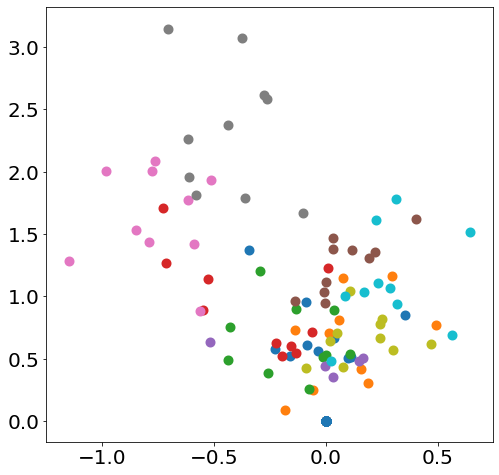

In [34]:
#plot_embeddings(train_embeddings_otl, train_labels_otl, save_plot='training.png', legend= True, leyend_prop=15,figsize=(8,8))
plot_embeddings(valid_emb, valid_labels,save_plot='valid.png',linewidths=4, figsize=(8,8))

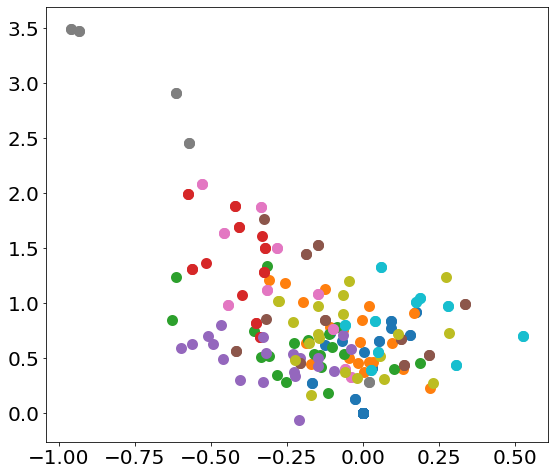

In [35]:
plot_embeddings(test_emb, test_labels,save_plot='testing.png',linewidths=5)

## Nearest neighboors classification

Text(0, 0.5, 'Classification acc')

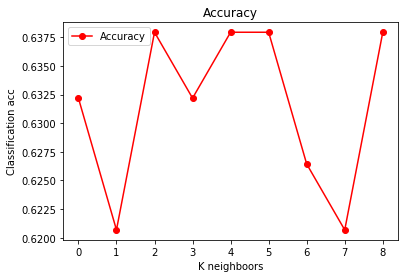

In [36]:
acc =[]
for i in range(1,10):
    KNN = KNC(n_neighbors=i)
    KNN.fit(train_emb, train_labels)
    acc.append(KNN.score(valid_emb,valid_labels))
    
    
title = 'Accuracy'
plt.title(title)
plt.plot(acc, 'o-', color="r",label= "Accuracy")
plt.legend(loc="best")
plt.xlabel("K neighboors")
plt.ylabel("Classification acc")

In [65]:
KNN = KNC(n_neighbors=2)
KNN.fit(train_emb, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

## Accuracy on poems differnt from training and validation set

In [66]:
balanced_accuracy_score(test_labels, KNN.predict(test_emb))

0.33183673469387753

### Confusion matrix

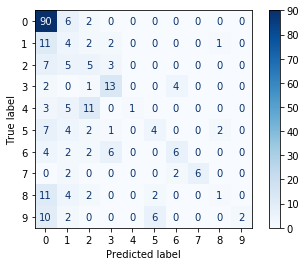

In [67]:

preds  = KNN.predict(test_emb)

cm = multilabel_confusion_matrix(test_labels,preds)
plot_confusion_matrix(KNN, test_emb,test_labels,
                                 display_labels=[0,1,2,3,4,5,6,7,8,9],
                                 cmap=plt.cm.Blues)

## Is authorencoder really an encoder?

To test is authoencoder can really encode other authors, let us look at ten different 
authors



In [68]:
new_authors = ['Anonymous', 'Dryden', 'Ashbery', 'Longfellow', 'Donne', 'Koethe', 'Pinsky', 'Gordon', 'Bradstreet', 'Walcott'];
tokenized_train_data_ = 'top20_10_train.pkl'
tokenized_valid_data_ = 'top20_10_valid.pkl'
tokenized_test_data_ = 'top20_10_test.pkl'

train_Loader_ = data_to_Iterator(data_dir,tokenized_train_data_)
valid_Loader_ = data_to_Iterator(data_dir,tokenized_valid_data_)
test_Loader_ = data_to_Iterator(data_dir,tokenized_test_data_)

other_train_emb, other_train_labels = extract_embeddings(train_Loader_, MODEL, 2)
other_valid_emb, other_valid_labels = extract_embeddings(valid_Loader_, MODEL, 2)



### Remarkable the embedding still tend to close different authors.

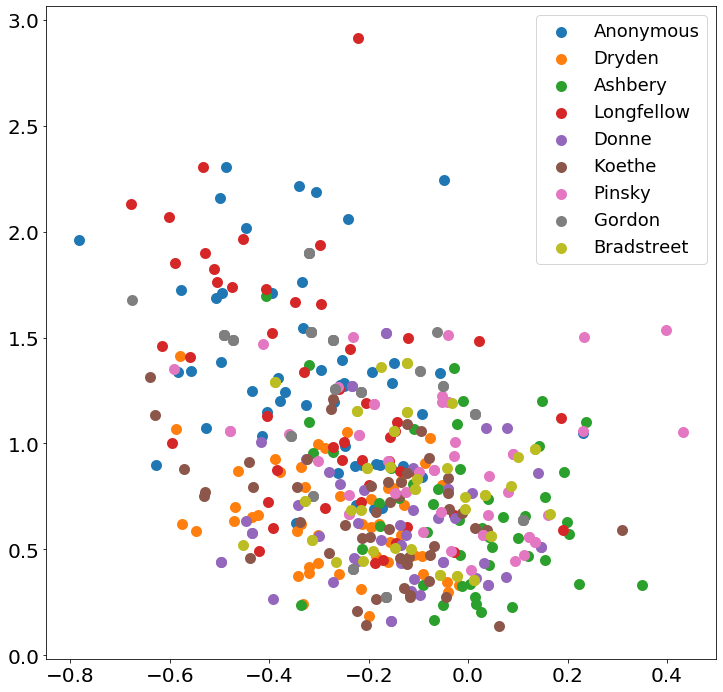

In [69]:
def plot_embeddings(embeddings, targets, xlim=None, ylim=None,  save_plot= None,linewidths=2 ,legend= False,
                   figsize=(12,12),leyend_prop=18):
    plt.figure(figsize=(figsize))
    for i in range (11,20):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=1,linewidths=linewidths )
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if legend: plt.legend(new_authors, prop={'size': leyend_prop} )
    plt.tick_params(axis='both', labelsize=20)
    if save_plot!=None:
        plt.savefig('../media/'+save_plot)
        
plot_embeddings(other_train_emb, other_train_labels, save_plot='training_newauthors.png', linewidths=5, legend=True)

### Even more surprisingly this cluster give rise to a much better classifier than 1/10

In [70]:
KNN = KNC(n_neighbors=3)
KNN.fit(other_train_emb, other_train_labels)
balanced_accuracy_score(other_valid_labels, KNN.predict(other_valid_emb))

0.2204545454545455